In [2]:
import numpy as np

# Jocobi Method


A = np.array([[ 3., -2.,  0.,  0.],
              [-2.,  4., -2.,  0.],
              [ 0., -2.,  6., -4.],
              [ 0.,  0., -4.,  4.]])

D = np.array([[ 3., 0., 0., 0.],
              [ 0., 4., 0., 0.],
              [ 0., 0., 6., 0.],
              [ 0., 0., 0., 4.]])

L = np.array([[ 0.,  0.,  0.,  0.],
              [-2.,  0.,  0.,  0.],
              [ 0., -2.,  0.,  0.],
              [ 0.,  0., -4.,  0.]])

U = np.array([[ 0., -2., 0.,  0.],
              [ 0., 0., -2.,  0.],
              [ 0.,  0., 0., -4.],
              [ 0.,  0., 0.,  0.]])

b = np.array([0,2,1,8])
u_vec = np.array([0,0,0,0.])
u_vec_new = np.array([0,0,0,0.])

residual_convergence = 1e-10
residual = np.linalg.norm(np.dot(A, u_vec) - b) #Initial residual

iter_count = 0
while residual > residual_convergence:
    iter_count+=1
    for i in range(4):
        sigma_i = 0
        for j in range(4):
            sigma_i += L[i][j] * u_vec[j] + U[i][j] * u_vec[j]
        u_vec_new[i] = 1./D[i][i] * ( b[i] - sigma_i)
    #swap 
    u_vec[:] = u_vec_new[:]
    residual = np.linalg.norm(np.dot(A, u_vec) - b)

print ("res = {:5.2e}".format(residual))
print ("u_vec = {}".format(u_vec))
print ("iter_count = {}".format(iter_count))

#res = 9.38e-11
#u_vec = [11.  16.5 21.  23. ]
#iter_count = 662

res = 9.38e-11
u_vec = [11.  16.5 21.  23. ]
iter_count = 662


In [3]:
# GS method

u_vec = np.array([0,0,0,0.])
u_vec_new = np.array([0,0,0,0.])

residual_convergence = 1e-10
residual = np.linalg.norm(np.dot(A, u_vec) - b) #Initial residual

iter_count = 0
while residual > residual_convergence:
    iter_count+=1
    for i in range(4):
        sigma_i = 0
        for j in range(4):
            sigma_i += L[i][j] * u_vec_new[j] + U[i][j] * u_vec[j]
        u_vec_new[i] = 1./D[i][i] * ( b[i] - sigma_i)
    #swap 
    u_vec[:] = u_vec_new[:]
    residual = np.linalg.norm(np.dot(A, u_vec) - b)

print ("res = {:5.2e}".format(residual))
print ("u_vec = {}".format(u_vec))
print ("iter_count = {}".format(iter_count))

#res = 9.51e-11
#u_vec = [11.  16.5 21.  23. ]
#iter_count = 332




res = 9.51e-11
u_vec = [11.  16.5 21.  23. ]
iter_count = 332


In [13]:




# SOR method

u_vec = np.array([0,0,0,0.])
u_vec_new = np.array([0,0,0,0.])

omega = 1.6

residual_convergence = 1e-10
residual = np.linalg.norm(np.dot(A, u_vec) - b) #Initial residual

iter_count = 0
while residual > residual_convergence:
    iter_count+=1
    for i in range(4):
        sigma_i = 0
        for j in range(4):
            sigma_i += L[i][j] * u_vec_new[j] + U[i][j] * u_vec[j]
        u_vec_new[i] = (1. - omega ) * u_vec[i] + omega/D[i][i] * ( b[i] - sigma_i)
    #swap 
    u_vec[:] = u_vec_new[:]
    residual = np.linalg.norm(np.dot(A, u_vec) - b)

print ("res = {:5.2e}".format(residual))
print ("u_vec = {}".format(u_vec))
print ("iter_count = {}".format(iter_count))

#res = 9.51e-11
#u_vec = [11.  16.5 21.  23. ]
#iter_count = 332




res = 8.98e-11
u_vec = [11.  16.5 21.  23. ]
iter_count = 54


In [15]:
u_vec = np.array([0,0,0,0.])
u_vec_new = np.array([0,0,0,0.])
residual_convergence = 1e-10
omega = 1.6 #Relaxation factor
residual = np.linalg.norm(np.dot(A, u_vec) - b) #Initial residual
iter_count = 0
while residual > residual_convergence:
    iter_count+=1
    for i in range(4): # range(4)
        sigma_i = 0
        for j in range(4): # range(4)
            if (j<i):
                sigma_i +=A[i][j] * u_vec_new[j]
            if (j>i):
                sigma_i +=A[i][j] * u_vec[j]

        u_vec_new[i] = (1 - omega) * u_vec[i] + (omega / A[i][i]) * (b[i] - sigma_i)
    u_vec[:] = u_vec_new[:]
    residual = np.linalg.norm(np.dot(A, u_vec) - b)
print ("res = {:5.2e}".format(residual))
print ("u_vec = {}".format(u_vec))
print ("iter_count = {}".format(iter_count))




res = 8.98e-11
u_vec = [11.  16.5 21.  23. ]
iter_count = 54


In [16]:
u_vec = np.array([0,0,0,0.])
u_vec_new = np.array([0,0,0,0.])
residual_convergence = 1e-10
omega = 1.6 #Relaxation factor
residual = np.linalg.norm(np.dot(A, u_vec) - b) #Initial residual
iter_count = 0

while residual > residual_convergence:
    iter_count+=1
    for i in range(4): 
        sigma_i = 0
        for j in range(4):
            if j != i:
                sigma_i += A[i][j] * u_vec[j]
        u_vec[i] = (1 - omega) * u_vec[i] + (omega / A[i][i]) * (b[i] - sigma_i)
    residual = np.linalg.norm(np.dot(A, u_vec) - b)

print ("res = {:5.2e}".format(residual))
print ("u_vec = {}".format(u_vec))
print ("iter_count = {}".format(iter_count))



res = 8.98e-11
u_vec = [11.  16.5 21.  23. ]
iter_count = 54


In [1]:
import numpy as np
### Check 1
a = np.array([1,2,3])
b = np.array([10,20,30])
b = a
print ("a={}".format(a))
print ("b={}".format(b))
b[1] = 10
print ("a={}".format(a))
print ("b={}".format(b))
print ("==========")
#=====






a=[1 2 3]
b=[1 2 3]
a=[ 1 10  3]
b=[ 1 10  3]


In [2]:



### Check 2
a = np.array([1,2,3])
b = np.array([10,20,30])
b[:] = a[:]
print ("a={}".format(a))
print ("b={}".format(b))
b[1] = 10
print ("a={}".format(a))
print ("b={}".format(b))
print ("==========")






a=[1 2 3]
b=[1 2 3]
a=[1 2 3]
b=[ 1 10  3]


In [3]:
### Check 3
a = np.array([1,2,3])
b = np.array([10,20,30])
b=np.copy(a)
print ("a={}".format(a))
print ("b={}".format(b))
b[1] = 10
print ("a={}".format(a))
print ("b={}".format(b))
print ("==========")

a=[1 2 3]
b=[1 2 3]
a=[1 2 3]
b=[ 1 10  3]


In [5]:


k_01 = 1. # N/m
k_12 = 1. # N/m
k_23 = 1. # N/m
k_34 = 1. # N/m










[[ 3. -2.  0.  0.]
 [-2.  3. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  1.]]


In [10]:


    
#=== 
A = np.array([[k_01+k_12, -k_12, 0,  0.],
              [-k_12, k_12+k_23, -k_23, 0],
              [0, -k_23, k_23+k_34, -k_34],
              [ 0.,  0., -k_34, k_34]])

print (A)





print ("b_vec = ", b_vec)
#solve y1, y2, y3, y4
#Solve A y = b

#




Sol = np.linalg.solve(A,b_vec)
print ("Solution =", Sol)



[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  1.]]
b_vec =  [0.1 0.1 0.1 1.1]
Solution = [1.4 2.7 3.9 5. ]


In [ ]:


m1_g = 0.1 #N
m2_g = 0.1 #N
m3_g = 0.1 #N
m4_g = 0.1 #N
#===
l_01 = 1. # m 
l_12 = 1. # m
l_23 = 1. # m
l_34 = 1. # m
#===
k_01 = 1. # N/m
k_12 = 1. # N/m
k_23 = 1. # N/m
k_34 = 1. # N/m




In [18]:

#===
#k_vec = [k_01,k_12,k_23,k_34]
#mg_vec = [m1_g,m2_g,m3_g,m4_g]
#l_vec = [l_01, l_12, l_23, l_34]


k_vec = [1.0, 1.0, 1.0, 3.0] # N/m
mg_vec = [10.0, 1.0, 1.0, 1.0 ] # external forces/gravity
l_vec = [1.0, 1.0, 1.0, 1.0] # meters
y = FindBallPosition(k_vec, mg_vec, l_vec)





Solution = [14.         18.         21.         22.33333333]


Solution = [1.4 2.7 3.9 5. ]


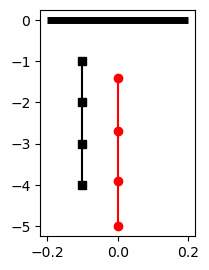

In [20]:

#=====
import numpy as np
import matplotlib.pyplot as plt

def FindBallPosition(k_vec, mg_vec, l_vec):
    [k_01,k_12,k_23,k_34] = k_vec
    [m1_g,m2_g,m3_g,m4_g] = mg_vec 
    [l_01, l_12, l_23, l_34] = l_vec
    #=== 
    A = np.array([[k_01+k_12, -k_12, 0,  0.],
              [-k_12, k_12+k_23, -k_23, 0],
              [0, -k_23, k_23+k_34, -k_34],
              [ 0.,  0., -k_34, k_34]])
    
    #===b_vec
    b1 = m1_g + k_01 * l_01 - k_12 * l_12
    b2 = m2_g + k_12 * l_12 - k_23 * l_23
    b3 = m3_g + k_23 * l_23 - k_34 * l_34
    b4 = m4_g + k_34 * l_34
    b_vec = np.array([b1, b2, b3, b4])
    Sol = np.linalg.solve(A,b_vec)
    print ("Solution =", Sol)
    return Sol
    
    
    
k_vec = np.array([1.,1.,1.,1.,])  # N/m
l_vec = np.array([1.,1.,1.,1.,]) # meters
mg_vec = np.array([0.1,0.1,0.1,0.1]) # N


fig = plt.figure( dpi = 100 )
fig.set_size_inches(2,3)
#=====
ceiling_y = 0
#y1,y2,y3,y4 = -y_vec

#=====
plt.hlines(0, -0.2, 0.2, colors='k',lw = 5)
ball_y0 = np.array([1,2,3,4]) 
plt.plot(ball_x-0.1,-ball_y0,'k-s' )
#ball_x = np.array([0,0,0,0])
ball_y= FindBallPosition(k_vec, mg_vec, l_vec)
plt.plot(ball_x, -ball_y, 'r-o')
#
#




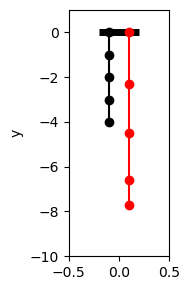

In [27]:


def FindBallPosition(k_vec, l_vec,mg_vec):
    #==== Springs ===
    k_01,k_12,k_23,k_34 = k_vec[0],k_vec[1],k_vec[2],k_vec[3] #N/m
    #====
    l_01,l_12,l_23,l_34 = l_vec[0],l_vec[1],l_vec[2],l_vec[3] #meters
    #====External Force ===
    m1_g,m2_g,m3_g,m4_g = mg_vec[0],mg_vec[1],mg_vec[2],mg_vec[3] #N
    #====
    A = np.array([[k_01+k_12, -k_12, 0,  0.],
                  [-k_12, k_12+k_23, -k_23, 0],
                  [0, -k_23, k_23+k_34, -k_34],
                  [ 0.,  0., -k_34, k_34]])
    #===b_vec
    b1 = m1_g + k_01 * l_01 - k_12 * l_12
    b2 = m2_g + k_12 * l_12 - k_23 * l_23
    b3 = m3_g + k_23 * l_23 - k_34 * l_34
    b4 = m4_g + k_34 * l_34
    b_vec = np.array([b1, b2, b3, b4])
    y_vec = np.linalg.solve(A,b_vec)
    return [A,b_vec,y_vec]

#=====
import numpy as np
import matplotlib.pyplot as plt

k_vec = np.array([1.,1.,1.,1.,])  # N/m
l_vec = np.array([1.,1.,1.,1.,]) # meters
mg_vec = np.array([0.1 ,0.1,1.0,0.1]) # N




[A,b_vec,y_vec] = FindBallPosition(k_vec, l_vec,mg_vec)

fig = plt.figure( dpi = 100 )
fig.set_size_inches(2,3)
#=====
ceiling_y = 0
y1,y2,y3,y4 = -y_vec
#=====
ball_x = np.array([0,0,0,0,0])
ball_y = np.array([ceiling_y,y1,y2,y3,y4])
ball_y0 = np.array([0,-1,-2,-3,-4])
#===
plt.hlines(0, -0.2, 0.2, colors='k',lw = 5)
plt.plot(ball_x - 0.1 , ball_y0,'-ko')
plt.plot(ball_x + 0.1, ball_y,'-ro')
plt.xlim(-0.5,0.5)
plt.ylim(-10,1)
#plt.axis('equal')
plt.ylabel('y')
plt.tight_layout()





In [8]:

print (y_vec)

[array([1.4, 2.7, 3.9, 5. ])]
